# Amittai W

## Computational Comparative Literature

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from pandas import DataFrame
pd.set_option('display.max_rows', 600)
from pathlib import Path  
import glob
from os import path
import numpy.random as random
from IPython.display import display, HTML
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess

In [2]:
# stop words

class Colors:
  HEADER = '\033[95m'
  OKBLUE = '\033[94m'
  OKCYAN = '\033[96m'
  OKGREEN = '\033[92m'
  WARNING = '\033[93m'
  FAIL = '\033[91m'
  ENDC = '\033[0m'
  BOLD = '\033[1m'
  UNDERLINE = '\033[4m'

def load_stopwords():
  stopwords = []
  with open("../data/metadata/stopwords.txt") as f:
    for line in f:
      # print(line)
      stopwords.append(line.strip()) # .append(line.strip())
  return stopwords

stop_words = load_stopwords()

print(Colors.OKBLUE + "Hello, welcome to my project!" + Colors.ENDC)
print(f"{stop_words = }")

Hello, welcome to my project!
stop_words = ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause', 'causes', 'certain', 'cert

In [3]:
# years to focus on
years = [str(yr) for yr in range(2000, 2023)]

# max count per year
max_count = 10

years, max_count

(['2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022'],
 10)

1.

In [8]:
# load $count files for each year.
directory_path = "../data/categorized"

def load_dictionary():
  # all_words = []
  dictionary = set()
  dictionary_file = "../data/metadata/dictionary"
  with open(dictionary_file) as f:
    for line in f:
      dictionary.add(line.strip().lower())
  return dictionary

def load_counts():
  with open("../data/metadata/counts.csv", "r") as counts_file:
    counts = pd.read_csv(counts_file)
  return counts

def load_words_str():
  """Load data (words) into a list of strings."""
  all_words = load_words()
  return [" ".join(w) for w in all_words]

def load_words():
  """Load data (words) into a list of lists of words."""
  dictionary = load_dictionary()
  all_words = []
  for year in years:
    possible_files = [f for f in glob.glob(f"{directory_path}/{year}/*.txt") if path.exists(f)]
    num_files = min(max_count, len(possible_files))
    files = random.choice(possible_files, size=num_files, replace=True)
    words = []
    for file in files:
      with open(file) as f:
        for line in f:
          for word in line.strip().lower().split():
            if word in dictionary and word not in ["old", "id"]:
              words.append(word)
    # pd = DataFrame([year, words], columns=["year", "words"])
    all_words.append(words)
  return all_words

def load_data():
  """Load data (words0 into a dataframe)"""
  all_words = load_words_str()
  df = pd.DataFrame(all_words, columns = ["words"])
  df.insert(0, "year", years, allow_duplicates=False)
  return df

raw_data = load_data()
raw_data.head(100)


,year,words
0,2000,a functional cartography of cognitive the new ...
1,2001,combat halo alpha fandom combat combat combat ...
2,2002,complexity and ambiguity complexity and an acr...
3,2003,protein folding ai is going after protein fold...
4,2004,what the new report about humankind wired to t...
5,2005,data in the us is an wired to this visit my sa...
6,2006,overview of molecular simulation annual review...
7,2007,congress to know more about police surveillanc...
8,2008,better language and their better language and ...
9,2009,an help desk system based on conversational ag...


In [9]:
# load stopwords
stop_words = load_stopwords()
stop_words

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',
 'can',
 'ca

In [10]:
# initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(input='content', stop_words=load_stopwords(), strip_accents="ascii")
tfidf_vector = tfidf_vectorizer.fit_transform(raw_data["words"])


tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=[str(year) for year in years], columns=tfidf_vectorizer.get_feature_names_out())
# data.append(tfidf_df)
data = tfidf_df
data.loc["document"] = data.sum(axis=0)

/root/anaconda3/envs/ml/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['didn', 'doesn', 'don', 'hasn', 'haven', 'isn', 'keep', 'keeps', 'll', 'shouldn', 'sure', 've'] not in stop_words.
  warnings.warn(


In [11]:
# Re-organize so words are in rows rather than columns
cleaned_data = data.sort_index().stack().reset_index()
cleaned_data = cleaned_data.rename(columns={0:'tfidf', 'level_0': 'year','level_1': 'term', 'level_2': 'term'})
# stacked_tfidf_df.sample(n=20)
cleaned_data.sample(n=20)

,year,term,tfidf
36497,2002,previous,0.001715
284411,2020,unreachable,0.000000
175249,2012,touring,0.000000
27381,2002,advanced,0.000000
291941,2021,laughter,0.001683
108919,2008,agreement,0.003855
194937,2014,forger,0.000000
128276,2009,individual,0.006549
191782,2014,cardiovascular,0.000000
102209,2007,luminescence,0.000000


In [13]:
# top 10 words for all stories
#! MemoryError: Unable to allocate 97.5 GiB for an array with shape (23351, 560214) and data type float64
top_tfidf = cleaned_data.groupby(['year', 'term'])['tfidf'].sum().sort_values(ascending=False).groupby('year')
top_tfidf.head(1000)
# top_tf_

year      term       
document  data           2.002086
          protein        1.410373
          technology     1.259820
          ai             1.185873
          people         1.139992
                           ...   
2002      aware          0.002546
          incorporate    0.002546
          mechanical     0.002546
          obvious        0.002546
          reaction       0.002546
Name: tfidf, Length: 24000, dtype: float64

In [16]:
# view the top words by year.

for year, data in top_tfidf:
  print(data.head(20))
  print("\n")


year  term       
2000  everett        0.538842
      dominance      0.202485
      ino            0.170852
      cognitive      0.165110
      protein        0.143257
      depressed      0.135617
      task           0.132650
      cyclops        0.124854
      film           0.122673
      network        0.116970
      pete           0.116134
      rumination     0.110549
      amino          0.093716
      comic          0.091997
      functional     0.090023
      recruitment    0.088953
      sheriff        0.085426
      brain          0.085063
      system         0.082968
      integration    0.080831
Name: tfidf, dtype: float64


year  term       
2001  chromatin      0.478923
      nuclear        0.271729
      chromosome     0.252845
      combat         0.222865
      freehand       0.207059
      covenant       0.203489
      cell           0.156582
      halo           0.152616
      game           0.148629
      human          0.140287
      interphase     0.132143
    

2.

In [17]:
# check for a single word
def check_word(df, word, count):
  """Check the occurrence of a word in a dataframe."""
  return df[df['term'] == word].sort_values("tfidf", ascending=False).head(count)


In [18]:
check_word(cleaned_data, "ethics", 20)

,year,term,tfidf
316521,document,ethics,0.117629
180751,2013,ethics,0.017276
262213,2019,ethics,0.017019
140020,2010,ethics,0.016143
221482,2016,ethics,0.012764
235059,2017,ethics,0.009283
58558,2004,ethics,0.007690
248636,2018,ethics,0.006663
302944,2022,ethics,0.004877
289367,2021,ethics,0.004352


In [19]:
check_word(cleaned_data, "death", 20)

,year,term,tfidf
315312,document,death,0.078839
57349,2004,death,0.029413
179542,2013,death,0.006882
193119,2014,death,0.006307
3041,2000,death,0.005804
247427,2018,death,0.005309
98080,2007,death,0.004722
274581,2020,death,0.003922
220273,2016,death,0.003814
70926,2005,death,0.003453


## Latent Dirichlet Allocation (LDA)

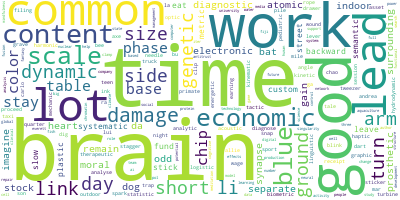

,year,term,tfidf
315283,document,data,2.002086
321773,document,protein,1.410373
324298,document,technology,1.259820
312578,document,ai,1.185873
321031,document,people,1.139992
...,...,...,...
324223,document,takedown,0.000423
321038,document,perceiving,0.000423
323439,document,solicit,0.000423
320326,document,neutralize,0.000423


In [22]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

sorted_words = cleaned_data[cleaned_data["year"] == "document"].sort_values("tfidf", ascending=False)
all_words = ",".join(sorted_words["term"].values)
# Generate a word cloud
wordcloud.generate(all_words)
# Visualize the word cloud
display(wordcloud.to_image())
sorted_words

In [23]:
import gensim.corpora as corpora

all_words = load_words()
all_words[5]

id2word = corpora.Dictionary(all_words) # year_data) for year_data in all_words]

# Term Document Frequency
corpus = [id2word.doc2bow(year_data) for year_data in all_words]
# View
print(corpus[:1][0][:30])
# print(corpus[:1][0][:30])

[(0, 1773), (1, 1), (2, 1), (3, 5), (4, 14), (5, 84), (6, 4), (7, 3), (8, 3), (9, 2), (10, 1), (11, 1), (12, 1), (13, 18), (14, 1), (15, 2), (16, 3), (17, 1), (18, 2), (19, 1), (20, 11), (21, 1), (22, 4), (23, 1), (24, 1), (25, 7), (26, 1), (27, 1), (28, 4), (29, 9)]


In [24]:
from pprint import pprint
# number of topics
print(corpus[:1][0][:30])
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, 1773), (1, 1), (2, 1), (3, 5), (4, 14), (5, 84), (6, 4), (7, 3), (8, 3), (9, 2), (10, 1), (11, 1), (12, 1), (13, 18), (14, 1), (15, 2), (16, 3), (17, 1), (18, 2), (19, 1), (20, 11), (21, 1), (22, 4), (23, 1), (24, 1), (25, 7), (26, 1), (27, 1), (28, 4), (29, 9)]
[(0,
  '0.085*"the" + 0.043*"to" + 0.041*"and" + 0.037*"of" + 0.034*"in" + '
  '0.031*"a" + 0.018*"that" + 0.016*"for" + 0.013*"is" + 0.010*"with"'),
 (1,
  '0.064*"the" + 0.046*"and" + 0.044*"of" + 0.032*"a" + 0.031*"to" + '
  '0.030*"in" + 0.015*"for" + 0.013*"with" + 0.012*"that" + 0.012*"is"'),
 (2,
  '0.057*"the" + 0.051*"of" + 0.039*"in" + 0.038*"to" + 0.029*"and" + '
  '0.027*"a" + 0.018*"that" + 0.015*"for" + 0.013*"is" + 0.012*"with"'),
 (3,
  '0.069*"the" + 0.056*"of" + 0.045*"and" + 0.031*"to" + 0.029*"in" + '
  '0.027*"a" + 0.020*"is" + 0.014*"that" + 0.013*"for" + 0.011*"with"'),
 (4,
  '0.096*"the" + 0.050*"of" + 0.038*"and" + 0.031*"a" + 0.026*"to" + '
  '0.021*"in" + 0.016*"for" + 0.015*"with" + 0.013*"that

In [27]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
LDAvis_data_filepath = f"ldavis_prepared_{str(num_topics)}"
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

rebuild = False  # change this to rebuild the visualization
if rebuild:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f"{LDAvis_data_filepath}.html")
LDAvis_prepared

/root/anaconda3/envs/ml/lib/python3.10/site-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/root/anaconda3/envs/ml/lib/python3.10/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/root/anaconda3/envs/ml/lib/python3.10/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/root/anaconda3/envs/ml/lib/python3.10/site-packages/joblib/backports.py:36: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(np.__version__) < '1.13':
/root/anaconda3/envs/ml/lib/python3.10/site-packages/joblib/backports.py:36: Deprecat

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.003544 -0.000998       1        1  35.990034
0     -0.001844 -0.002310       2        1  19.885461
4     -0.004377  0.002336       3        1  15.602899
3     -0.001365 -0.001428       4        1   9.859772
1      0.001785  0.002103       5        1   6.621339
9      0.003857 -0.001485       6        1   5.502681
2      0.002942 -0.002167       7        1   3.058756
6     -0.001281  0.000265       8        1   1.714008
8      0.002416  0.003945       9        1   0.987398
5      0.001411 -0.000259      10        1   0.777652, topic_info=      Term          Freq         Total Category  logprob  loglift
3194   the  55503.000000  55503.000000  Default  30.0000  30.0000
2180    of  32638.000000  32638.000000  Default  29.0000  29.0000
141    and  27605.000000  27605.000000  Default  28.0000  28.0000
0        a  20311.000000  20311.000000  Default  27.0000  27.0000
3255    to  22691.000000  22691.000000  Default  26.0000  26.0000
...    ...           ...           ...      ...      ...      ...
1349  from     34.164722   5081.406966  Topic10  -5.0338  -0.1455
194     as     34.723287   5467.064512  Topic10  -5.0176  -0.2024
2210    or     22.228885   3019.066881  Topic10  -5.4636  -0.0547
414    but     19.278935   2672.810782  Topic10  -5.6060  -0.0752
427    can     18.500007   2856.723812  Topic10  -5.6473  -0.1830

[839 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
0          1  0.365908       a
0          2  0.202007       a
0          3  0.159912       a
0          4  0.087144       a
0          5  0.070848       a
...      ...       ...     ...
3579       8  0.019650     you
3579       9  0.011410     you
3579      10  0.006973     you
12511      1  0.410822  zoning
12511      2  0.410822  zoning

[2874 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 1, 5, 4, 2, 10, 3, 7, 9, 6])